In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train[1234].shape
#第1234筆資料的樣子

(28, 28)

In [0]:
# CNN 要的是 (28, 28, 1)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [10]:
x_train[1234].shape

(28, 28, 1)

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train = x_train/255
x_test = x_test/255
#把數值壓縮到0-1，可以套用更多數學理論

In [0]:
####


# 做 3 次 convolution, 每次(3)都接 max-pooling
# 2dense
# output:10

# conv01:4
# conv02:16
# conv03:64
###越來越多比較符合人體，用二的幾次方比較好做

# 17
# 33
# 神經元個數



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(16, (5, 5), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64, (5, 5), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(27, activation='relu'))
# 先flat再做dense

In [0]:
model.add(Dense(10, activation='softmax'))
# softmax是最後一層

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        1616      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 64)          25664     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)              

In [72]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.0898 - acc: 0.1933
Epoch 2/10
60000/60000 [==============================] - 47s 783us/step - loss: 0.0892 - acc: 0.4026
Epoch 3/10
60000/60000 [==============================] - 47s 789us/step - loss: 0.0873 - acc: 0.4488
Epoch 4/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0663 - acc: 0.5401
Epoch 5/10
60000/60000 [==============================] - 47s 787us/step - loss: 0.0329 - acc: 0.7840
Epoch 6/10
60000/60000 [==============================] - 48s 795us/step - loss: 0.0203 - acc: 0.8673
Epoch 7/10
60000/60000 [==============================] - 47s 791us/step - loss: 0.0112 - acc: 0.9292
Epoch 8/10
60000/60000 [==============================] - 48s 795us/step - loss: 0.0091 - acc: 0.9414
Epoch 9/10
60000/60000 [==============================] - 48s 796us/step - loss: 0.0079 - acc: 0.9492
Epoch 10/10
60000/60000 [==============================] - 48s 793us/step - loss: 

In [73]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 357us/step


In [74]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00649
測試資料的正確率: 0.9575


In [0]:
model.save('myCNNmodel.h5')

In [0]:
predict = model.predict_classes(x_test)


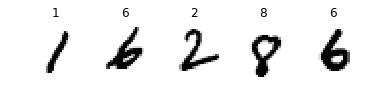

In [51]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")